<a href="https://colab.research.google.com/github/Jcasttrop/Implementation-of-the-a-priori-algorithm-for-a-recommendation-system-based-on-product-associations./blob/main/Creaci%C3%B3n_de_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

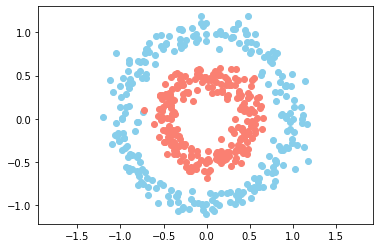

In [2]:
#Crear el dataset

n = 500
p = 2

#n es el numero de registros de los datos, y p las caracteristicas que tenemos

X,Y = make_circles(n_samples=n, factor=0.5, noise=0.09) #factor es la distancia entre los circulos

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1],c="skyblue")
plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1],c="salmon")
plt.axis("equal")
plt.show()

**Nuestro problema es que podamos separar la nube de puntos roja de la azul**

In [3]:
#CLASE DE LAS LAYERS

class neural_layer():
  def __init__(self,n_conections,n_neurons,activation_function):

    self.act_f = activation_function

    self.B = np.random.rand(1,n_neurons) * 2 -1

    self.W = np.random.rand(n_conections,n_neurons) * 2 -1

In [4]:
#DEFINICION DE LAS FUNCIONES DE ACTIVACION
#Las funciones fueron creadas con funciones anonimas que contienen tanto la derivada como la explicita

sigmoid = (lambda x: 1/(1+np.e**(-x)),
           lambda x: x * (1 -x))

relu = lambda x: np.maximum(0,x)

In [5]:
#creacion de la layer_0, llamando a la clase generadora

def create_nn(architecture, activation_function):

  nn = []

  for i, layer in enumerate(architecture[:-1]):

    nn.append(neural_layer(architecture[i], architecture[i+1], activation_function))

  return nn

In [6]:
architecture = [p, 4, 8, 1]

neural_net = create_nn(architecture, sigmoid)

#Definimos el error cuadratico medio
mse_cost = (lambda Yp,Yr : np.mean((Yp - Yr) ** 2),
            lambda Yp, Yr: (Yp - Yr))
#Yp es el valor predicho, Yp es el valor real



def train(neural_net, imput_data, output_data, lost_function,learning_rate=0.5,train=True):

  output_G = [(None, imput_data)]
  
  #Forward pass (cojer el vector de entrada y pasarlo capa por capa ejecutando las operaciones de la neurona)

  #Hacemos de forma iterativa cada capa

  for l, layer in enumerate(neural_net):

    #z es la suma ponderada
    z = output_G[-1][1] @ neural_net[l].W + neural_net[l].B

    #a es la funcion de activacion; aqui le aplicamos la funcion
    a = neural_net[l].act_f[0](z)

    output_G.append((z,a))

    print(output_G[-1][1])


  if train:
    #Nosoreos le dimos la opcion a la funcion de que pueda o no ser entrenada

    #Backpropagation

    #este vector delta es lo que ayudará al gradiante
    delta =  []

    for l in reversed(range(0, len(neural_net))):

      z = output_G[l+1][0]

      a = output_G[l+1][1]

      #Para la ultima capa

      if l == len(neural_net) -1:

        #error de la capa con respecto al coste

        delta.insert(0,mse_cost[1](a, Y) * neural_net[l].act_f[1](a))

      #Para las otras capas

      else:

        delta.insert(0,delta[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W

    # Gradient descent

    #Este requiere que nosotros pasemos de nuevo por cada una de las capas de la red neuronaal
    #para actualizar los valores; en vez de hacerlo con otro bucle que recorra las
    #capas hacia adelante actualizando los valores, ppodemos directamente cuando hacemos el 
    #backpropagation, actualizar los parametros

      neural_net[l].B = neural_net[l].B - np.mean(delta[0], axis=0, keepdims=True) * learning_rate

      neural_net[l].W = neural_net[l].W - output_G[l][1].T @ delta[0] * learning_rate

  return  output_G[-1][1]

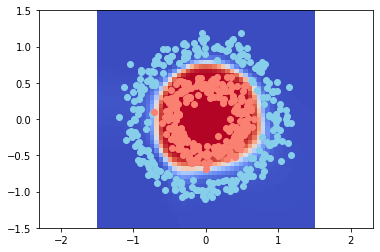

[[0.67785372 0.59126416 0.03727824 0.0683263 ]
 [0.14675158 0.97189509 0.56552509 0.85735452]
 [0.19226593 0.98365409 0.59842129 0.89353827]
 ...
 [0.01359472 0.03388224 0.08523162 0.03807796]
 [0.84237146 0.81009015 0.04015065 0.10613086]
 [0.11913433 0.97669006 0.62994772 0.89194303]]
[[1.66638562e-01 4.26080081e-04 9.68838058e-01 ... 6.73714445e-03
  1.40174998e-01 9.79652084e-01]
 [7.67208552e-02 7.83997456e-07 7.34437372e-01 ... 4.66041411e-01
  1.01245203e-01 5.94626062e-05]
 [5.85213189e-02 5.73055621e-07 5.83139412e-01 ... 5.20071307e-01
  7.74405284e-02 7.67631366e-05]
 ...
 [4.85452182e-01 3.96434173e-01 5.02871864e-01 ... 4.12442961e-01
  3.59658463e-01 5.28063816e-01]
 [1.16934274e-01 2.54559150e-05 9.93069747e-01 ... 1.63191740e-03
  1.11038944e-01 9.82097165e-01]
 [6.65229807e-02 7.63796637e-07 5.92255581e-01 ... 6.25327044e-01
  8.66800623e-02 2.81502027e-05]]
[[2.68824892e-02]
 [9.94281583e-01]
 [9.55815416e-01]
 [3.49634039e-02]
 [6.12420485e-02]
 [9.99919045e-01]
 [9.

In [9]:
import time
from IPython.display import clear_output

neural_n = create_nn(architecture, sigmoid)

loss = []


for i in range(1000):

  #Entrenemos a la red

  pY = train(neural_n, X, Y, mse_cost,learning_rate=0.1)


  if i % 25 == 0:

    print(pY)

    loss.append(mse_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):

        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, mse_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0,0], X[Y[:,0] == 0,1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1,0], X[Y[:,0] == 1,1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()

    time.sleep(0.5)